# Proyek Analisis Data: PRSA Data
- **Nama:** Gilar Sumilar
- **Email:** gilarz2100@gmail.com
- **ID Dicoding:** 

# Menentukan pertanyaan

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [431]:
Data_Aotizhongxin = pd.read_csv('./AirQualityDataset/PRSA_Data_Aotizhongxin.csv')
Data_Changping = pd.read_csv('./AirQualityDataset/PRSA_Data_Changping.csv')
Data_Dingling = pd.read_csv('./AirQualityDataset/PRSA_Data_Dingling.csv')
Data_Dongsi = pd.read_csv('./AirQualityDataset/PRSA_Data_Dongsi.csv')
Data_Guanyuan = pd.read_csv('./AirQualityDataset/PRSA_Data_Guanyuan.csv')
Data_Gucheng = pd.read_csv('./AirQualityDataset/PRSA_Data_Gucheng.csv')
Data_Huairou = pd.read_csv('./AirQualityDataset/PRSA_Data_Huairou.csv')
Data_Nongzhanguan = pd.read_csv('./AirQualityDataset/PRSA_Data_Nongzhanguan.csv')
Data_Shunyi = pd.read_csv('./AirQualityDataset/PRSA_Data_Shunyi.csv')
Data_Tiantan = pd.read_csv('./AirQualityDataset/PRSA_Data_Tiantan.csv')
Data_Wanliu = pd.read_csv('./AirQualityDataset/PRSA_Data_Wanliu.csv')
Data_Wanshouxigong = pd.read_csv('./AirQualityDataset/PRSA_Data_Wanshouxigong.csv')

In [432]:
Data_Aotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [433]:
# Hapus kolom yang tidak diperlukan
Data_Aotizhongxin = Data_Aotizhongxin.drop(['No', 'PM2.5', 'PRES', 'DEWP'], axis=1)

# Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime
Data_Aotizhongxin['datetime'] = pd.to_datetime(Data_Aotizhongxin[['year', 'month', 'day', 'hour']])

# Hapus kolom tanggal dan waktu yang lama
Data_Aotizhongxin = Data_Aotizhongxin.drop(['year', 'month', 'day', 'hour'], axis=1)

# Define arah angin
arah_angin = {
    'N': ['NNW', 'N', 'NNE', 'NE'],
    'E': ['ENE', 'E', 'ESE', 'SE'],
    'S': ['SSE', 'S', 'SSW', 'SW'],
    'W': ['WSW', 'W', 'WNW', 'NW']
}

# Fungsi untuk mengubah arah angin
def change_arah_angin(row):
    for key, values in arah_angin.items():
        if row['wd'] in values:
            return key
    return row['wd']

# Terapkan fungsi ke kolom 'wd'
Data_Aotizhongxin['wd'] = Data_Aotizhongxin.apply(change_arah_angin, axis=1)

Data_Aotizhongxin.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,4.0,4.0,7.0,300.0,77.0,-0.7,0.0,N,4.4,Aotizhongxin,2013-03-01 00:00:00
1,8.0,4.0,7.0,300.0,77.0,-1.1,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,7.0,5.0,10.0,300.0,73.0,-1.1,0.0,N,5.6,Aotizhongxin,2013-03-01 02:00:00
3,6.0,11.0,11.0,300.0,72.0,-1.4,0.0,W,3.1,Aotizhongxin,2013-03-01 03:00:00
4,3.0,12.0,12.0,300.0,72.0,-2.0,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


Note :
- Ada beberapa kolom yang saya hapus seperti No, PM.25, PRES(Tekanan Udara), dan DWEP(Titik embun) 
  yang tidak akan saya gunakan untuk membuat analisis kedepan nya.
- Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime agar lebih efesien.
- Ubah arah angin menjadi north, south, east, west, seperti NNW(north-northwest) ubah menjadi N(nort)

### Assessing Data Aotizhongxin


In [434]:
# Data Aotizhongxin info
Data_Aotizhongxin.info()
print(f'\n{Data_Aotizhongxin.isna().sum()}')

print("\nJumlah duplikasi: ", Data_Aotizhongxin.duplicated().sum())
Data_Aotizhongxin.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   PM10      34346 non-null  float64       
 1   SO2       34129 non-null  float64       
 2   NO2       34041 non-null  float64       
 3   CO        33288 non-null  float64       
 4   O3        33345 non-null  float64       
 5   TEMP      35044 non-null  float64       
 6   RAIN      35044 non-null  float64       
 7   wd        34983 non-null  object        
 8   WSPM      35050 non-null  float64       
 9   station   35064 non-null  object        
 10  datetime  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 2.9+ MB

PM10         718
SO2          935
NO2         1023
CO          1776
O3          1719
TEMP          20
RAIN          20
wd            81
WSPM          14
station        0
datetime       0
dtype: int64

Jumlah duplikasi:  0

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35050.000000,35064
mean,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,0.067421,1.708496,2015-03-01 11:30:00
min,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,0.000000,0.000000,2013-03-01 00:00:00
25%,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,0.000000,0.900000,2014-03-01 05:45:00
50%,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,0.000000,1.400000,2015-03-01 11:30:00
75%,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,0.000000,2.200000,2016-02-29 17:15:00
max,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,72.500000,11.200000,2017-02-28 23:00:00
std,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,0.910056,1.204071,NaN


Note :
- Terdapat cukup banyak missing value pada PM.10, SO2, NO2, CO, O3, TEMP, RAIN, wd, dan WSPM. Untuk mengisi masing-masing dari missing value saya menggunakan median pada 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM', menggunakan mean pada TEMP, modus pada RAIN. 

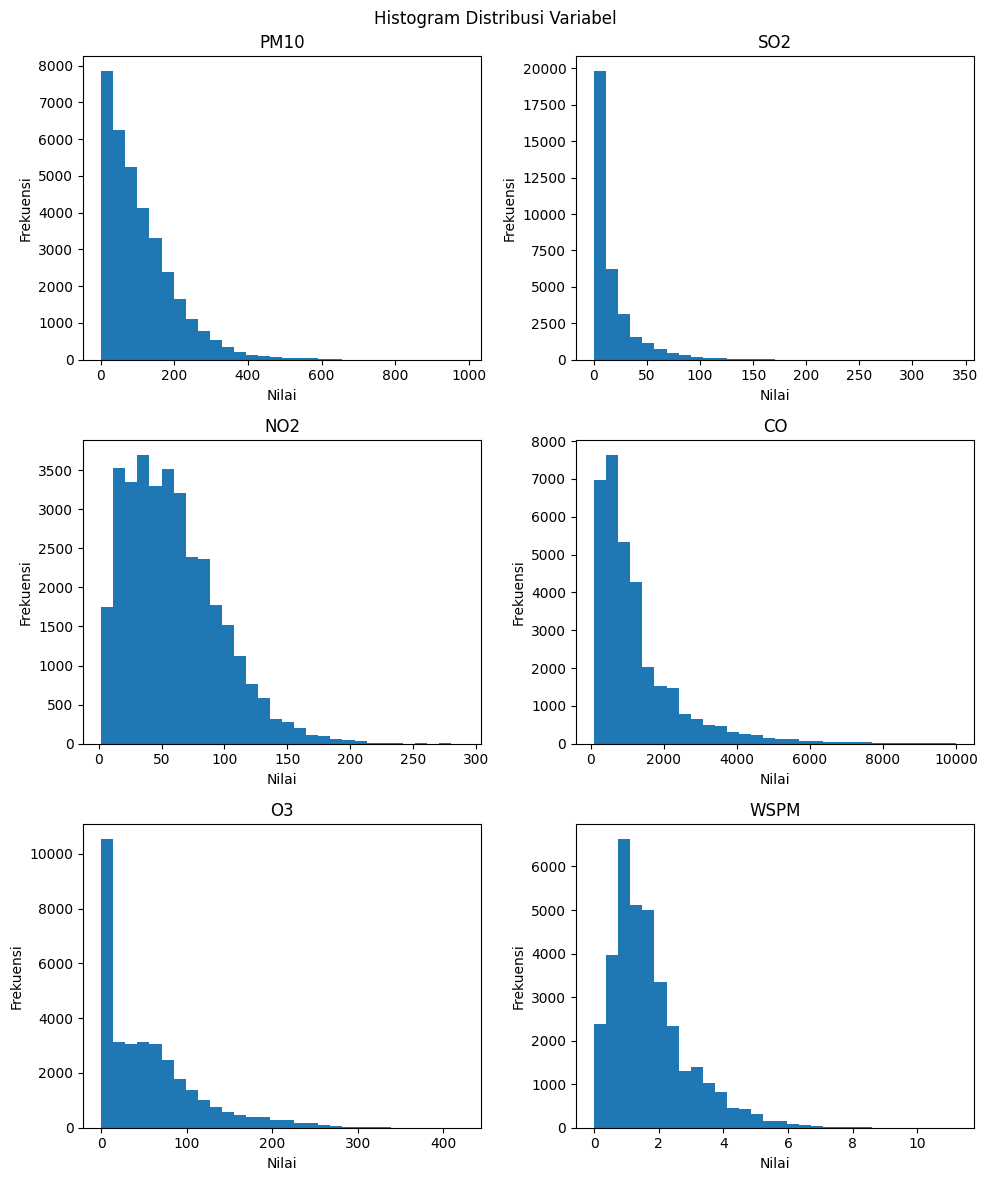

In [435]:
# Daftar variabel yang ingin diplot
variables = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

# Membuat figure dan subplot (3 baris, 2 kolom)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))  # Sesuaikan ukuran figure jika perlu

# Mengatur judul untuk keseluruhan figure
fig.suptitle('Histogram Distribusi Variabel')

# Membuat histogram untuk setiap variabel
for i, var in enumerate(variables):
    row = i // 2  # Karena ada 2 kolom, bagi dengan 2
    col = i % 2
    ax = axes[row, col]
    ax.hist(Data_Aotizhongxin[var], bins=30)
    ax.set_title(var)
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Frekuensi')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

- Histogram yang di tampilkan menunjukkan distribusi data 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM' yang tidak simetris atau skewed ke kanan. Artinya,     sebagian besar data terkonsentrasi di sisi kiri (nilai yang lebih rendah), sedangkan ada sedikit data dengan nilai yang sangat tinggi di sisi kanan.    jadi saya menggunalan median karena untuk data  yang skewed ke kanan, median biasanya merupakan pilihan yang lebih baik.

### Cleaning Data Aotizhongxin

In [436]:
# Pilih dan isi missing value dengan median
columns_to_fill = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

for column in columns_to_fill:
    Data_Aotizhongxin[column] = Data_Aotizhongxin[column].fillna(Data_Aotizhongxin[column].median())

Data_Aotizhongxin.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP        20
RAIN        20
wd          81
WSPM         0
station      0
datetime     0
dtype: int64

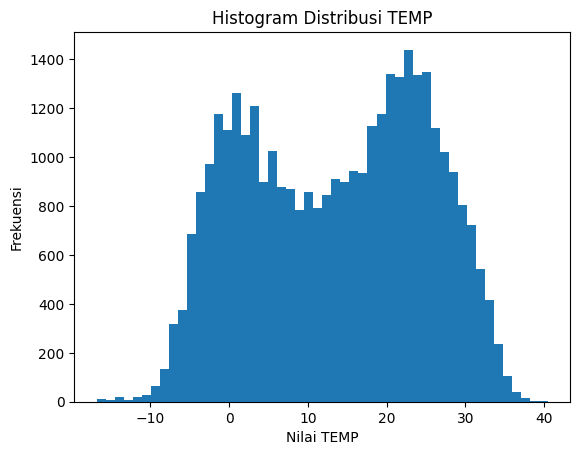

In [437]:
# Membuat histogram untuk cek persebaran data TEMP
plt.hist(Data_Aotizhongxin['TEMP'], bins=50)
plt.title('Histogram Distribusi TEMP')
plt.xlabel('Nilai TEMP')
plt.ylabel('Frekuensi')
plt.show()

- Secara umum, distribusi TEMP cenderung mendekati bentuk lonceng (normal distribution). Ini berarti sebagian besar data berkumpul di sekitar nilai       tengah, dan semakin menjauh dari nilai tengah, frekuensinya semakin sedikit. Karena distribusi TEMP yang mendekati normal dan jumlah missing value      yang relatif sedikit, jadi saya menggunakan mean.

In [438]:
# Pilih dan isi missing value dengan mean
columns_to_fill = ['TEMP']

for column in columns_to_fill:
    Data_Aotizhongxin[column] = Data_Aotizhongxin[column].fillna(Data_Aotizhongxin[column].mean())

Data_Aotizhongxin.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN        20
wd          81
WSPM         0
station      0
datetime     0
dtype: int64

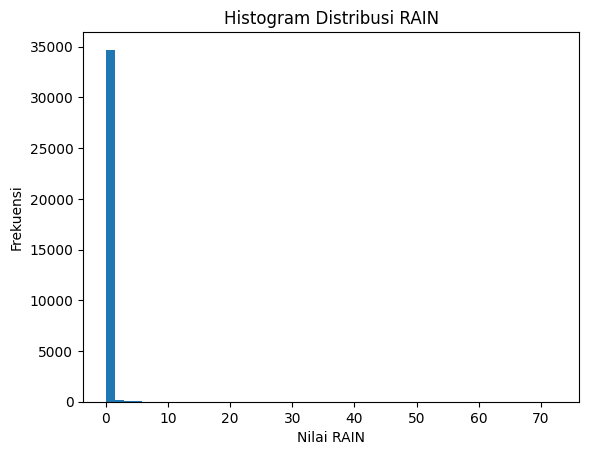

In [439]:
# Membuat histogram untuk cek persebaran data RAIN
plt.hist(Data_Aotizhongxin['RAIN'], bins=50)
plt.title('Histogram Distribusi RAIN')
plt.xlabel('Nilai RAIN')
plt.ylabel('Frekuensi')
plt.show()

- Berdasarkan histogram yang di tampilkan, data curah hujan (RAIN) memiliki distribusi yang sangat miring ke kanan. Ini mengindikasikan bahwa             sebagian besar data bernilai 0 atau mendekati 0, dengan sedikit sekali kejadian curah hujan yang tinggi. Kondisi ini cukup umum pada data curah         hujan, terutama di daerah dengan iklim kering.  Karena modus dari data RAIN kemungkinan besar adalah 0, maka mengisi missing value dengan modus juga    bisa menjadi pilihan.

In [440]:
# Karena 0 adalah angka yang sering muncul jadi saya jadikan 0 saja
columns_to_fill = ['RAIN']
for column in columns_to_fill:
  Data_Aotizhongxin[column] = Data_Aotizhongxin[column].fillna(Data_Aotizhongxin[column].mode()[0])
Data_Aotizhongxin.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN         0
wd          81
WSPM         0
station      0
datetime     0
dtype: int64

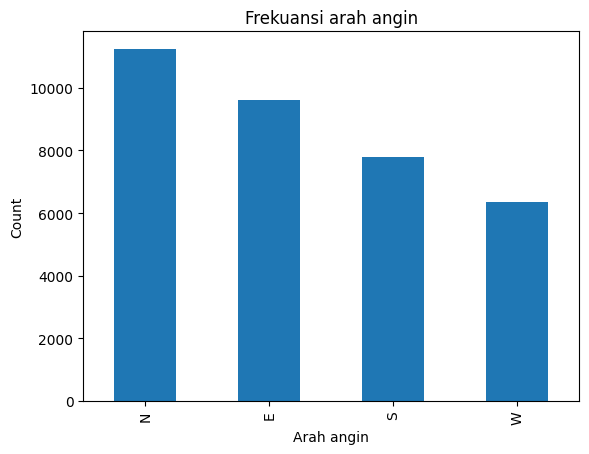

In [441]:
# Melihat frekuansi arah angin
wind_direction_counts = Data_Aotizhongxin['wd'].value_counts()

# Create a bar chart
wind_direction_counts.plot(kind='bar')
plt.title('Frekuansi arah angin')
plt.xlabel('Arah angin')
plt.ylabel('Count')
plt.show()

- Saya asumsikan missing value pada wd(arah angin) adalah data yang sering muncul.

In [442]:
modus_wd = Data_Aotizhongxin['wd'].mode()[0]
Data_Aotizhongxin['wd'] = Data_Aotizhongxin['wd'].fillna(modus_wd)
Data_Aotizhongxin['wd'] = Data_Aotizhongxin['wd'].fillna(Data_Aotizhongxin['wd'].mode()[0])
Data_Aotizhongxin.isna().sum()

PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [443]:
Data_Aotizhongxin.describe()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,109.588187,17.152554,59.121859,1244.561887,55.649690,13.584607,0.067383,1.708373,2015-03-01 11:30:00
min,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,0.000000,0.000000,2013-03-01 00:00:00
25%,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,0.000000,0.900000,2014-03-01 05:45:00
50%,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,0.000000,1.400000,2015-03-01 11:30:00
75%,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,0.000000,2.200000,2016-02-29 17:15:00
max,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,72.500000,11.200000,2017-02-28 23:00:00
std,94.299574,22.557057,36.586135,1192.758674,56.563751,11.395845,0.909798,1.203846,NaN


#### Wrangling data untuk tabel Aotizhongxin sudah, untuk selanjutnya lakukan ke tabel yang lain nya.

### Wrangling Data Changping

In [444]:
# Hapus kolom yang tidak diperlukan
Data_Changping = Data_Changping.drop(['No', 'PM2.5', 'PRES', 'DEWP'], axis=1)

# Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime
Data_Changping['datetime'] = pd.to_datetime(Data_Changping[['year', 'month', 'day', 'hour']])

# Hapus kolom tanggal dan waktu yang lama
Data_Changping = Data_Changping.drop(['year', 'month', 'day', 'hour'], axis=1)

# Define arah angin
arah_angin = {
    'N': ['NNW', 'N', 'NNE', 'NE'],
    'E': ['ENE', 'E', 'ESE', 'SE'],
    'S': ['SSE', 'S', 'SSW', 'SW'],
    'W': ['WSW', 'W', 'WNW', 'NW']
}

# Fungsi untuk mengubah arah angin
def change_arah_angin(row):
    for key, values in arah_angin.items():
        if row['wd'] in values:
            return key
    return row['wd']

# Terapkan fungsi ke kolom 'wd'
Data_Changping['wd'] = Data_Changping.apply(change_arah_angin, axis=1)

Data_Changping.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,6.0,13.0,7.0,300.0,85.0,-2.3,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,3.0,6.0,6.0,300.0,85.0,-2.5,0.0,E,0.7,Changping,2013-03-01 01:00:00
2,3.0,22.0,13.0,400.0,74.0,-3.0,0.0,E,0.2,Changping,2013-03-01 02:00:00
3,6.0,12.0,8.0,300.0,81.0,-3.6,0.0,N,1.0,Changping,2013-03-01 03:00:00
4,3.0,14.0,8.0,300.0,81.0,-3.5,0.0,N,2.1,Changping,2013-03-01 04:00:00


In [445]:
# Pilih dan isi missing value dengan median
columns_to_fill = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

for column in columns_to_fill:
    Data_Changping[column] = Data_Changping[column].fillna(Data_Changping[column].median())

Data_Changping.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP         53
RAIN         51
wd          140
WSPM          0
station       0
datetime      0
dtype: int64

In [446]:
# Pilih dan isi missing value dengan mean
columns_to_fill = ['TEMP']

for column in columns_to_fill:
    Data_Changping[column] = Data_Changping[column].fillna(Data_Changping[column].mean())

Data_Changping.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
RAIN         51
wd          140
WSPM          0
station       0
datetime      0
dtype: int64

In [447]:
# Karena 0 adalah angka yang sering muncul jadi saya jadikan 0 saja
columns_to_fill = ['RAIN']
for column in columns_to_fill:
  Data_Changping[column] = Data_Changping[column].fillna(Data_Changping[column].mode()[0])
Data_Changping.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
RAIN          0
wd          140
WSPM          0
station       0
datetime      0
dtype: int64

In [448]:
modus_wd = Data_Changping['wd'].mode()[0]
Data_Changping['wd'] = Data_Changping['wd'].fillna(modus_wd)
Data_Changping['wd'] = Data_Changping['wd'].fillna(Data_Changping['wd'].mode()[0])
Data_Changping.isna().sum()

PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [449]:
Data_Changping.describe()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,35064.00000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,94.28179,14.816361,44.026443,1137.019279,57.734328,13.686111,0.060278,1.853402,2015-03-01 11:30:00
min,2.00000,0.285600,1.847700,100.000000,0.214200,-16.600000,0.000000,0.000000,2013-03-01 00:00:00
25%,34.00000,2.000000,22.000000,500.000000,16.000000,3.400000,0.000000,1.000000,2014-03-01 05:45:00
50%,72.00000,7.000000,36.000000,800.000000,46.000000,14.600000,0.000000,1.500000,2015-03-01 11:30:00
75%,129.00000,18.000000,60.000000,1400.000000,79.000000,23.300000,0.000000,2.300000,2016-02-29 17:15:00
max,999.00000,310.000000,226.000000,10000.000000,429.000000,41.400000,52.100000,10.000000,2017-02-28 23:00:00
std,82.79695,20.813426,29.259029,1081.250627,53.869215,11.356720,0.752355,1.309064,NaN


### Wrangling Data Dingling

In [450]:
# Hapus kolom yang tidak diperlukan
Data_Dingling = Data_Dingling.drop(['No', 'PM2.5', 'PRES', 'DEWP'], axis=1)

# Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime
Data_Dingling['datetime'] = pd.to_datetime(Data_Dingling[['year', 'month', 'day', 'hour']])

# Hapus kolom tanggal dan waktu yang lama
Data_Dingling = Data_Dingling.drop(['year', 'month', 'day', 'hour'], axis=1)

# Define arah angin
arah_angin = {
    'N': ['NNW', 'N', 'NNE', 'NE'],
    'E': ['ENE', 'E', 'ESE', 'SE'],
    'S': ['SSE', 'S', 'SSW', 'SW'],
    'W': ['WSW', 'W', 'WNW', 'NW']
}

# Fungsi untuk mengubah arah angin
def change_arah_angin(row):
    for key, values in arah_angin.items():
        if row['wd'] in values:
            return key
    return row['wd']

# Terapkan fungsi ke kolom 'wd'
Data_Dingling['wd'] = Data_Dingling.apply(change_arah_angin, axis=1)

Data_Dingling.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,4.0,3.0,NaN,200.0,82.0,-2.3,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,7.0,3.0,NaN,200.0,80.0,-2.5,0.0,E,0.7,Dingling,2013-03-01 01:00:00
2,5.0,3.0,2.0,200.0,79.0,-3.0,0.0,E,0.2,Dingling,2013-03-01 02:00:00
3,6.0,3.0,NaN,200.0,79.0,-3.6,0.0,N,1.0,Dingling,2013-03-01 03:00:00
4,5.0,3.0,NaN,200.0,81.0,-3.5,0.0,N,2.1,Dingling,2013-03-01 04:00:00


In [451]:
# Pilih dan isi missing value dengan median
columns_to_fill = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

for column in columns_to_fill:
    Data_Dingling[column] = Data_Dingling[column].fillna(Data_Dingling[column].median())

Data_Dingling.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP         53
RAIN         51
wd          140
WSPM          0
station       0
datetime      0
dtype: int64

In [452]:
# Pilih dan isi missing value dengan mean
columns_to_fill = ['TEMP']

for column in columns_to_fill:
    Data_Dingling[column] = Data_Dingling[column].fillna(Data_Dingling[column].mean())

Data_Dingling.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
RAIN         51
wd          140
WSPM          0
station       0
datetime      0
dtype: int64

In [453]:
# Karena 0 adalah angka yang sering muncul jadi saya jadikan 0 saja
columns_to_fill = ['RAIN']
for column in columns_to_fill:
  Data_Dingling[column] = Data_Dingling[column].fillna(Data_Dingling[column].mode()[0])
Data_Dingling.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
RAIN          0
wd          140
WSPM          0
station       0
datetime      0
dtype: int64

In [454]:
modus_wd = Data_Dingling['wd'].mode()[0]
Data_Dingling['wd'] = Data_Dingling['wd'].fillna(modus_wd)
Data_Dingling['wd'] = Data_Dingling['wd'].fillna(Data_Dingling['wd'].mode()[0])
Data_Dingling.isna().sum()

PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [455]:
Data_Dingling.describe()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,83.295585,11.609128,27.283320,887.400896,68.287028,13.686111,0.060278,1.853402,2015-03-01 11:30:00
min,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,0.000000,0.000000,2013-03-01 00:00:00
25%,26.000000,2.000000,9.000000,300.000000,32.000000,3.400000,0.000000,1.000000,2014-03-01 05:45:00
50%,60.000000,5.000000,19.000000,600.000000,61.000000,14.600000,0.000000,1.500000,2015-03-01 11:30:00
75%,116.000000,14.000000,37.000000,1100.000000,89.000000,23.300000,0.000000,2.300000,2016-02-29 17:15:00
max,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,52.100000,10.000000,2017-02-28 23:00:00
std,78.859721,15.387066,25.963693,879.868464,52.843495,11.356720,0.752355,1.309064,NaN


### Wrangling Data Dongsi

In [456]:
# Hapus kolom yang tidak diperlukan
Data_Dongsi = Data_Dongsi.drop(['No', 'PM2.5', 'PRES', 'DEWP'], axis=1)

# Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime
Data_Dongsi['datetime'] = pd.to_datetime(Data_Dongsi[['year', 'month', 'day', 'hour']])

# Hapus kolom tanggal dan waktu yang lama
Data_Dongsi = Data_Dongsi.drop(['year', 'month', 'day', 'hour'], axis=1)

# Define arah angin
arah_angin = {
    'N': ['NNW', 'N', 'NNE', 'NE'],
    'E': ['ENE', 'E', 'ESE', 'SE'],
    'S': ['SSE', 'S', 'SSW', 'SW'],
    'W': ['WSW', 'W', 'WNW', 'NW']
}

# Fungsi untuk mengubah arah angin
def change_arah_angin(row):
    for key, values in arah_angin.items():
        if row['wd'] in values:
            return key
    return row['wd']

# Terapkan fungsi ke kolom 'wd'
Data_Dongsi['wd'] = Data_Dongsi.apply(change_arah_angin, axis=1)

Data_Dongsi.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,9.0,3.0,17.0,300.0,89.0,-0.5,0.0,N,5.7,Dongsi,2013-03-01 00:00:00
1,4.0,3.0,16.0,300.0,88.0,-0.7,0.0,W,3.9,Dongsi,2013-03-01 01:00:00
2,7.0,NaN,17.0,300.0,60.0,-1.2,0.0,N,5.3,Dongsi,2013-03-01 02:00:00
3,3.0,5.0,18.0,NaN,NaN,-1.4,0.0,N,4.9,Dongsi,2013-03-01 03:00:00
4,3.0,7.0,NaN,200.0,84.0,-1.9,0.0,N,3.2,Dongsi,2013-03-01 04:00:00


In [457]:
# Pilih dan isi missing value dengan median
columns_to_fill = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

for column in columns_to_fill:
    Data_Dongsi[column] = Data_Dongsi[column].fillna(Data_Dongsi[column].median())

Data_Dongsi.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP        20
RAIN        20
wd          78
WSPM         0
station      0
datetime     0
dtype: int64

In [458]:
# Pilih dan isi missing value dengan mean
columns_to_fill = ['TEMP']

for column in columns_to_fill:
    Data_Dongsi[column] = Data_Dongsi[column].fillna(Data_Dongsi[column].mean())

Data_Dongsi.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN        20
wd          78
WSPM         0
station      0
datetime     0
dtype: int64

In [459]:
# Karena 0 adalah angka yang sering muncul jadi saya jadikan 0 saja
columns_to_fill = ['RAIN']
for column in columns_to_fill:
  Data_Dongsi[column] = Data_Dongsi[column].fillna(Data_Dongsi[column].mode()[0])
Data_Dongsi.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN         0
wd          78
WSPM         0
station      0
datetime     0
dtype: int64

In [460]:
modus_wd = Data_Dongsi['wd'].mode()[0]
Data_Dongsi['wd'] = Data_Dongsi['wd'].fillna(modus_wd)
Data_Dongsi['wd'] = Data_Dongsi['wd'].fillna(Data_Dongsi['wd'].mode()[0])
Data_Dongsi.isna().sum()

PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [461]:
Data_Dongsi.describe()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064
mean,109.952923,18.369798,53.393550,1299.974703,56.962841,13.67149,0.063983,1.860641,2015-03-01 11:30:00
min,2.000000,0.285600,2.000000,100.000000,0.642600,-16.80000,0.000000,0.000000,2013-03-01 00:00:00
25%,38.000000,4.000000,28.000000,600.000000,13.000000,3.10000,0.000000,1.000000,2014-03-01 05:45:00
50%,86.000000,10.000000,47.000000,1000.000000,44.125200,14.60000,0.000000,1.500000,2015-03-01 11:30:00
75%,150.000000,24.000000,72.000000,1600.000000,80.000000,23.50000,0.000000,2.400000,2016-02-29 17:15:00
max,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.10000,46.400000,10.500000,2017-02-28 23:00:00
std,97.489403,22.717797,33.204335,1139.664773,57.508815,11.45515,0.786059,1.280133,NaN


### Wrangling Data Guanyuan

In [462]:
# Hapus kolom yang tidak diperlukan
Data_Guanyuan = Data_Guanyuan.drop(['No', 'PM2.5', 'PRES', 'DEWP'], axis=1)

# Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime
Data_Guanyuan['datetime'] = pd.to_datetime(Data_Guanyuan[['year', 'month', 'day', 'hour']])

# Hapus kolom tanggal dan waktu yang lama
Data_Guanyuan = Data_Guanyuan.drop(['year', 'month', 'day', 'hour'], axis=1)

# Define arah angin
arah_angin = {
    'N': ['NNW', 'N', 'NNE', 'NE'],
    'E': ['ENE', 'E', 'ESE', 'SE'],
    'S': ['SSE', 'S', 'SSW', 'SW'],
    'W': ['WSW', 'W', 'WNW', 'NW']
}

# Fungsi untuk mengubah arah angin
def change_arah_angin(row):
    for key, values in arah_angin.items():
        if row['wd'] in values:
            return key
    return row['wd']

# Terapkan fungsi ke kolom 'wd'
Data_Guanyuan['wd'] = Data_Guanyuan.apply(change_arah_angin, axis=1)

Data_Guanyuan.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,4.0,14.0,20.0,300.0,69.0,-0.7,0.0,N,4.4,Guanyuan,2013-03-01 00:00:00
1,4.0,13.0,17.0,300.0,72.0,-1.1,0.0,N,4.7,Guanyuan,2013-03-01 01:00:00
2,3.0,10.0,19.0,300.0,69.0,-1.1,0.0,N,5.6,Guanyuan,2013-03-01 02:00:00
3,6.0,7.0,24.0,400.0,62.0,-1.4,0.0,W,3.1,Guanyuan,2013-03-01 03:00:00
4,6.0,5.0,14.0,400.0,71.0,-2.0,0.0,N,2.0,Guanyuan,2013-03-01 04:00:00


In [463]:
# Pilih dan isi missing value dengan median
columns_to_fill = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

for column in columns_to_fill:
    Data_Guanyuan[column] = Data_Guanyuan[column].fillna(Data_Guanyuan[column].median())

Data_Guanyuan.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP        20
RAIN        20
wd          81
WSPM         0
station      0
datetime     0
dtype: int64

In [464]:
# Pilih dan isi missing value dengan mean
columns_to_fill = ['TEMP']

for column in columns_to_fill:
    Data_Guanyuan[column] = Data_Guanyuan[column].fillna(Data_Guanyuan[column].mean())

Data_Guanyuan.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN        20
wd          81
WSPM         0
station      0
datetime     0
dtype: int64

In [465]:
# Karena 0 adalah angka yang sering muncul jadi saya jadikan 0 saja
columns_to_fill = ['RAIN']
for column in columns_to_fill:
  Data_Guanyuan[column] = Data_Guanyuan[column].fillna(Data_Guanyuan[column].mode()[0])
Data_Guanyuan.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN         0
wd          81
WSPM         0
station      0
datetime     0
dtype: int64

In [466]:
modus_wd = Data_Guanyuan['wd'].mode()[0]
Data_Guanyuan['wd'] = Data_Guanyuan['wd'].fillna(modus_wd)
Data_Guanyuan['wd'] = Data_Guanyuan['wd'].fillna(Data_Guanyuan['wd'].mode()[0])
Data_Guanyuan.isna().sum()

PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [467]:
Data_Guanyuan.describe()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,108.778322,17.461290,57.771932,1252.731776,55.300104,13.584607,0.067383,1.708373,2015-03-01 11:30:00
min,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,0.000000,0.000000,2013-03-01 00:00:00
25%,41.000000,3.000000,31.000000,600.000000,8.000000,3.100000,0.000000,0.900000,2014-03-01 05:45:00
50%,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,0.000000,1.400000,2015-03-01 11:30:00
75%,148.000000,21.000000,78.000000,1500.000000,79.000000,23.300000,0.000000,2.200000,2016-02-29 17:15:00
max,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,72.500000,11.200000,2017-02-28 23:00:00
std,91.038393,23.466455,34.831577,1138.242638,56.530697,11.395845,0.909798,1.203846,NaN


### Wrangling Data Huairou

In [468]:
# Hapus kolom yang tidak diperlukan
Data_Huairou = Data_Huairou.drop(['No', 'PM2.5', 'PRES', 'DEWP'], axis=1)

# Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime
Data_Huairou['datetime'] = pd.to_datetime(Data_Huairou[['year', 'month', 'day', 'hour']])

# Hapus kolom tanggal dan waktu yang lama
Data_Huairou = Data_Huairou.drop(['year', 'month', 'day', 'hour'], axis=1)

# Define arah angin
arah_angin = {
    'N': ['NNW', 'N', 'NNE', 'NE'],
    'E': ['ENE', 'E', 'ESE', 'SE'],
    'S': ['SSE', 'S', 'SSW', 'SW'],
    'W': ['WSW', 'W', 'WNW', 'NW']
}

# Fungsi untuk mengubah arah angin
def change_arah_angin(row):
    for key, values in arah_angin.items():
        if row['wd'] in values:
            return key
    return row['wd']

# Terapkan fungsi ke kolom 'wd'
Data_Huairou['wd'] = Data_Huairou.apply(change_arah_angin, axis=1)

Data_Huairou.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,7.0,3.0,2.0,100.0,91.0,-2.3,0.0,W,3.1,Huairou,2013-03-01 00:00:00
1,4.0,3.0,NaN,100.0,92.0,-2.7,0.0,N,1.5,Huairou,2013-03-01 01:00:00
2,4.0,NaN,NaN,100.0,91.0,-3.2,0.0,W,1.8,Huairou,2013-03-01 02:00:00
3,3.0,3.0,2.0,NaN,NaN,-3.3,0.0,N,2.4,Huairou,2013-03-01 03:00:00
4,3.0,7.0,NaN,300.0,86.0,-4.1,0.0,N,2.2,Huairou,2013-03-01 04:00:00


In [469]:
# Pilih dan isi missing value dengan median
columns_to_fill = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

for column in columns_to_fill:
    Data_Huairou[column] = Data_Huairou[column].fillna(Data_Huairou[column].median())

Data_Huairou.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP         51
RAIN         55
wd          302
WSPM          0
station       0
datetime      0
dtype: int64

In [470]:
# Pilih dan isi missing value dengan mean
columns_to_fill = ['TEMP']

for column in columns_to_fill:
    Data_Huairou[column] = Data_Huairou[column].fillna(Data_Huairou[column].mean())

Data_Huairou.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
RAIN         55
wd          302
WSPM          0
station       0
datetime      0
dtype: int64

In [471]:
# Karena 0 adalah angka yang sering muncul jadi saya jadikan 0 saja
columns_to_fill = ['RAIN']
for column in columns_to_fill:
  Data_Huairou[column] = Data_Huairou[column].fillna(Data_Huairou[column].mode()[0])
Data_Huairou.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
RAIN          0
wd          302
WSPM          0
station       0
datetime      0
dtype: int64

In [472]:
modus_wd = Data_Huairou['wd'].mode()[0]
Data_Huairou['wd'] = Data_Huairou['wd'].fillna(modus_wd)
Data_Huairou['wd'] = Data_Huairou['wd'].fillna(Data_Huairou['wd'].mode()[0])
Data_Huairou.isna().sum()

PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [473]:
Data_Huairou.describe()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,90.984486,11.894565,32.146806,1013.528976,59.469384,12.445426,0.067833,1.651529,2015-03-01 11:30:00
min,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,0.000000,0.000000,2013-03-01 00:00:00
25%,29.000000,2.000000,13.000000,400.000000,19.000000,2.100000,0.000000,0.900000,2014-03-01 05:45:00
50%,69.000000,4.000000,25.000000,800.000000,49.000000,13.500000,0.000000,1.300000,2015-03-01 11:30:00
75%,128.000000,13.000000,45.000000,1300.000000,81.000000,22.300000,0.000000,2.000000,2016-02-29 17:15:00
max,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,45.900000,12.900000,2017-02-28 23:00:00
std,82.428022,18.678989,25.911379,881.419159,53.736632,11.742554,0.848384,1.198377,NaN


### Wrangling Data Gucheng

In [474]:
# Hapus kolom yang tidak diperlukan
Data_Gucheng = Data_Gucheng.drop(['No', 'PM2.5', 'PRES', 'DEWP'], axis=1)

# Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime
Data_Gucheng['datetime'] = pd.to_datetime(Data_Gucheng[['year', 'month', 'day', 'hour']])

# Hapus kolom tanggal dan waktu yang lama
Data_Gucheng = Data_Gucheng.drop(['year', 'month', 'day', 'hour'], axis=1)

# Define arah angin
arah_angin = {
    'N': ['NNW', 'N', 'NNE', 'NE'],
    'E': ['ENE', 'E', 'ESE', 'SE'],
    'S': ['SSE', 'S', 'SSW', 'SW'],
    'W': ['WSW', 'W', 'WNW', 'NW']
}

# Fungsi untuk mengubah arah angin
def change_arah_angin(row):
    for key, values in arah_angin.items():
        if row['wd'] in values:
            return key
    return row['wd']

# Terapkan fungsi ke kolom 'wd'
Data_Gucheng['wd'] = Data_Gucheng.apply(change_arah_angin, axis=1)

Data_Gucheng.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,18.0,5.0,NaN,800.0,88.0,0.1,0.0,W,4.4,Gucheng,2013-03-01 00:00:00
1,15.0,5.0,NaN,800.0,88.0,-0.3,0.0,W,4.0,Gucheng,2013-03-01 01:00:00
2,18.0,NaN,NaN,700.0,52.0,-0.7,0.0,W,4.6,Gucheng,2013-03-01 02:00:00
3,20.0,6.0,NaN,NaN,NaN,-1.0,0.0,W,2.8,Gucheng,2013-03-01 03:00:00
4,17.0,5.0,NaN,600.0,73.0,-1.3,0.0,W,3.6,Gucheng,2013-03-01 04:00:00


In [475]:
# Pilih dan isi missing value dengan median
columns_to_fill = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

for column in columns_to_fill:
    Data_Gucheng[column] = Data_Gucheng[column].fillna(Data_Gucheng[column].median())

Data_Gucheng.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP         51
RAIN         43
wd          159
WSPM          0
station       0
datetime      0
dtype: int64

In [476]:
# Pilih dan isi missing value dengan mean
columns_to_fill = ['TEMP']

for column in columns_to_fill:
    Data_Gucheng[column] = Data_Gucheng[column].fillna(Data_Gucheng[column].mean())

Data_Gucheng.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
RAIN         43
wd          159
WSPM          0
station       0
datetime      0
dtype: int64

In [477]:
# Karena 0 adalah angka yang sering muncul jadi saya jadikan 0 saja
columns_to_fill = ['RAIN']
for column in columns_to_fill:
  Data_Gucheng[column] = Data_Gucheng[column].fillna(Data_Gucheng[column].mode()[0])
Data_Gucheng.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
RAIN          0
wd          159
WSPM          0
station       0
datetime      0
dtype: int64

In [478]:
modus_wd = Data_Gucheng['wd'].mode()[0]
Data_Gucheng['wd'] = Data_Gucheng['wd'].fillna(modus_wd)
Data_Gucheng['wd'] = Data_Gucheng['wd'].fillna(Data_Gucheng['wd'].mode()[0])
Data_Gucheng.isna().sum()

PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [479]:
Data_Gucheng.describe()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,118.646161,15.245193,55.759226,1307.034309,57.430945,13.864524,0.064374,1.342899,2015-03-01 11:30:00
min,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,0.000000,0.000000,2013-03-01 00:00:00
25%,46.000000,2.000000,26.000000,600.000000,10.000000,3.700000,0.000000,0.600000,2014-03-01 05:45:00
50%,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,0.000000,1.000000,2015-03-01 11:30:00
75%,166.000000,19.000000,78.000000,1600.000000,82.000000,23.500000,0.000000,1.800000,2016-02-29 17:15:00
max,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,41.900000,12.000000,2017-02-28 23:00:00
std,96.237612,21.074340,36.133665,1187.465580,56.452790,11.284641,0.838142,1.150436,NaN


### Wrangling Data Nongzhanguan

In [480]:
# Hapus kolom yang tidak diperlukan
Data_Nongzhanguan = Data_Nongzhanguan.drop(['No', 'PM2.5', 'PRES', 'DEWP'], axis=1)

# Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime
Data_Nongzhanguan['datetime'] = pd.to_datetime(Data_Nongzhanguan[['year', 'month', 'day', 'hour']])

# Hapus kolom tanggal dan waktu yang lama
Data_Nongzhanguan = Data_Nongzhanguan.drop(['year', 'month', 'day', 'hour'], axis=1)

# Define arah angin
arah_angin = {
    'N': ['NNW', 'N', 'NNE', 'NE'],
    'E': ['ENE', 'E', 'ESE', 'SE'],
    'S': ['SSE', 'S', 'SSW', 'SW'],
    'W': ['WSW', 'W', 'WNW', 'NW']
}

# Fungsi untuk mengubah arah angin
def change_arah_angin(row):
    for key, values in arah_angin.items():
        if row['wd'] in values:
            return key
    return row['wd']

# Terapkan fungsi ke kolom 'wd'
Data_Nongzhanguan['wd'] = Data_Nongzhanguan.apply(change_arah_angin, axis=1)

Data_Nongzhanguan.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,14.0,4.0,12.0,200.0,85.0,-0.5,0.0,N,5.7,Nongzhanguan,2013-03-01 00:00:00
1,12.0,6.0,14.0,200.0,84.0,-0.7,0.0,W,3.9,Nongzhanguan,2013-03-01 01:00:00
2,6.0,5.0,14.0,200.0,83.0,-1.2,0.0,N,5.3,Nongzhanguan,2013-03-01 02:00:00
3,5.0,5.0,14.0,200.0,84.0,-1.4,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5.0,6.0,21.0,200.0,77.0,-1.9,0.0,N,3.2,Nongzhanguan,2013-03-01 04:00:00


In [481]:
# Pilih dan isi missing value dengan median
columns_to_fill = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

for column in columns_to_fill:
    Data_Nongzhanguan[column] = Data_Nongzhanguan[column].fillna(Data_Nongzhanguan[column].median())

Data_Nongzhanguan.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP        20
RAIN        20
wd          78
WSPM         0
station      0
datetime     0
dtype: int64

In [482]:
# Pilih dan isi missing value dengan mean
columns_to_fill = ['TEMP']

for column in columns_to_fill:
    Data_Nongzhanguan[column] = Data_Nongzhanguan[column].fillna(Data_Nongzhanguan[column].mean())

Data_Nongzhanguan.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN        20
wd          78
WSPM         0
station      0
datetime     0
dtype: int64

In [483]:
# Karena 0 adalah angka yang sering muncul jadi saya jadikan 0 saja
columns_to_fill = ['RAIN']
for column in columns_to_fill:
  Data_Nongzhanguan[column] = Data_Nongzhanguan[column].fillna(Data_Nongzhanguan[column].mode()[0])
Data_Nongzhanguan.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN         0
wd          78
WSPM         0
station      0
datetime     0
dtype: int64

In [484]:
modus_wd = Data_Nongzhanguan['wd'].mode()[0]
Data_Nongzhanguan['wd'] = Data_Nongzhanguan['wd'].fillna(modus_wd)
Data_Nongzhanguan['wd'] = Data_Nongzhanguan['wd'].fillna(Data_Nongzhanguan['wd'].mode()[0])
Data_Nongzhanguan.isna().sum()

PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [485]:
Data_Nongzhanguan.describe()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064
mean,108.690044,18.565999,57.957107,1309.754991,58.339367,13.67149,0.063983,1.860641,2015-03-01 11:30:00
min,2.000000,0.571200,2.000000,100.000000,0.214200,-16.80000,0.000000,0.000000,2013-03-01 00:00:00
25%,38.000000,3.000000,30.000000,500.000000,10.000000,3.10000,0.000000,1.000000,2014-03-01 05:45:00
50%,85.000000,9.000000,51.000000,900.000000,45.000000,14.60000,0.000000,1.500000,2015-03-01 11:30:00
75%,148.000000,23.000000,79.000000,1600.000000,83.000000,23.50000,0.000000,2.400000,2016-02-29 17:15:00
max,995.000000,257.000000,273.000000,10000.000000,390.000000,41.10000,46.400000,10.500000,2017-02-28 23:00:00
std,94.778710,24.150168,35.951326,1226.006366,58.000981,11.45515,0.786059,1.280133,NaN


### Wrangling Data Shunyi

In [486]:
# Hapus kolom yang tidak diperlukan
Data_Shunyi = Data_Shunyi.drop(['No', 'PM2.5', 'PRES', 'DEWP'], axis=1)

# Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime
Data_Shunyi['datetime'] = pd.to_datetime(Data_Shunyi[['year', 'month', 'day', 'hour']])

# Hapus kolom tanggal dan waktu yang lama
Data_Shunyi = Data_Shunyi.drop(['year', 'month', 'day', 'hour'], axis=1)

# Define arah angin
arah_angin = {
    'N': ['NNW', 'N', 'NNE', 'NE'],
    'E': ['ENE', 'E', 'ESE', 'SE'],
    'S': ['SSE', 'S', 'SSW', 'SW'],
    'W': ['WSW', 'W', 'WNW', 'NW']
}

# Fungsi untuk mengubah arah angin
def change_arah_angin(row):
    for key, values in arah_angin.items():
        if row['wd'] in values:
            return key
    return row['wd']

# Terapkan fungsi ke kolom 'wd'
Data_Shunyi['wd'] = Data_Shunyi.apply(change_arah_angin, axis=1)

Data_Shunyi.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,6.0,3.0,8.0,300.0,44.0,-0.9,0.0,W,9.3,Shunyi,2013-03-01 00:00:00
1,12.0,3.0,7.0,300.0,47.0,-1.1,0.0,W,9.4,Shunyi,2013-03-01 01:00:00
2,14.0,NaN,7.0,200.0,22.0,-1.7,0.0,W,8.6,Shunyi,2013-03-01 02:00:00
3,12.0,3.0,5.0,NaN,NaN,-2.1,0.0,W,6.6,Shunyi,2013-03-01 03:00:00
4,12.0,3.0,NaN,200.0,11.0,-2.4,0.0,W,4.5,Shunyi,2013-03-01 04:00:00


In [487]:
# Pilih dan isi missing value dengan median
columns_to_fill = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

for column in columns_to_fill:
    Data_Shunyi[column] = Data_Shunyi[column].fillna(Data_Shunyi[column].median())

Data_Shunyi.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP         51
RAIN         51
wd          483
WSPM          0
station       0
datetime      0
dtype: int64

In [488]:
# Pilih dan isi missing value dengan mean
columns_to_fill = ['TEMP']

for column in columns_to_fill:
    Data_Shunyi[column] = Data_Shunyi[column].fillna(Data_Shunyi[column].mean())

Data_Shunyi.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
RAIN         51
wd          483
WSPM          0
station       0
datetime      0
dtype: int64

In [489]:
# Karena 0 adalah angka yang sering muncul jadi saya jadikan 0 saja
columns_to_fill = ['RAIN']
for column in columns_to_fill:
  Data_Shunyi[column] = Data_Shunyi[column].fillna(Data_Shunyi[column].mode()[0])
Data_Shunyi.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
RAIN          0
wd          483
WSPM          0
station       0
datetime      0
dtype: int64

In [490]:
modus_wd = Data_Shunyi['wd'].mode()[0]
Data_Shunyi['wd'] = Data_Shunyi['wd'].fillna(modus_wd)
Data_Shunyi['wd'] = Data_Shunyi['wd'].fillna(Data_Shunyi['wd'].mode()[0])
Data_Shunyi.isna().sum()

PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [491]:
Data_Shunyi.describe()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,98.397308,13.255208,43.639911,1163.021504,54.683189,13.387969,0.061006,1.807147,2015-03-01 11:30:00
min,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,0.000000,0.000000,2013-03-01 00:00:00
25%,32.000000,2.000000,20.000000,500.000000,11.000000,3.000000,0.000000,1.000000,2014-03-01 05:45:00
50%,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,0.000000,1.500000,2015-03-01 11:30:00
75%,137.000000,16.000000,61.000000,1500.000000,76.000000,23.200000,0.000000,2.300000,2016-02-29 17:15:00
max,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,37.300000,12.800000,2017-02-28 23:00:00
std,88.485447,19.274920,30.416857,1123.773397,53.752281,11.475233,0.761118,1.287055,NaN


### Wrangling Data Tiantan

In [492]:
# Hapus kolom yang tidak diperlukan
Data_Tiantan = Data_Tiantan.drop(['No', 'PM2.5', 'PRES', 'DEWP'], axis=1)

# Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime
Data_Tiantan['datetime'] = pd.to_datetime(Data_Tiantan[['year', 'month', 'day', 'hour']])

# Hapus kolom tanggal dan waktu yang lama
Data_Tiantan = Data_Tiantan.drop(['year', 'month', 'day', 'hour'], axis=1)

# Define arah angin
arah_angin = {
    'N': ['NNW', 'N', 'NNE', 'NE'],
    'E': ['ENE', 'E', 'ESE', 'SE'],
    'S': ['SSE', 'S', 'SSW', 'SW'],
    'W': ['WSW', 'W', 'WNW', 'NW']
}

# Fungsi untuk mengubah arah angin
def change_arah_angin(row):
    for key, values in arah_angin.items():
        if row['wd'] in values:
            return key
    return row['wd']

# Terapkan fungsi ke kolom 'wd'
Data_Tiantan['wd'] = Data_Tiantan.apply(change_arah_angin, axis=1)

Data_Tiantan.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,6.0,4.0,8.0,300.0,81.0,-0.5,0.0,N,5.7,Tiantan,2013-03-01 00:00:00
1,29.0,5.0,9.0,300.0,80.0,-0.7,0.0,W,3.9,Tiantan,2013-03-01 01:00:00
2,6.0,4.0,12.0,300.0,75.0,-1.2,0.0,N,5.3,Tiantan,2013-03-01 02:00:00
3,6.0,4.0,12.0,300.0,74.0,-1.4,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5.0,7.0,15.0,400.0,70.0,-1.9,0.0,N,3.2,Tiantan,2013-03-01 04:00:00


In [493]:
# Pilih dan isi missing value dengan median
columns_to_fill = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

for column in columns_to_fill:
    Data_Tiantan[column] = Data_Tiantan[column].fillna(Data_Tiantan[column].median())

Data_Tiantan.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP        20
RAIN        20
wd          78
WSPM         0
station      0
datetime     0
dtype: int64

In [494]:
# Pilih dan isi missing value dengan mean
columns_to_fill = ['TEMP']

for column in columns_to_fill:
    Data_Tiantan[column] = Data_Tiantan[column].fillna(Data_Tiantan[column].mean())

Data_Tiantan.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN        20
wd          78
WSPM         0
station      0
datetime     0
dtype: int64

In [495]:
# Karena 0 adalah angka yang sering muncul jadi saya jadikan 0 saja
columns_to_fill = ['RAIN']
for column in columns_to_fill:
  Data_Tiantan[column] = Data_Tiantan[column].fillna(Data_Tiantan[column].mode()[0])
Data_Tiantan.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN         0
wd          78
WSPM         0
station      0
datetime     0
dtype: int64

In [496]:
modus_wd = Data_Tiantan['wd'].mode()[0]
Data_Tiantan['wd'] = Data_Tiantan['wd'].fillna(modus_wd)
Data_Tiantan['wd'] = Data_Tiantan['wd'].fillna(Data_Tiantan['wd'].mode()[0])
Data_Tiantan.isna().sum()

PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [497]:
Data_Tiantan.describe()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064
mean,105.999934,14.132702,53.031884,1285.512720,55.600006,13.67149,0.063983,1.860641,2015-03-01 11:30:00
min,2.000000,0.571200,2.000000,100.000000,0.428400,-16.80000,0.000000,0.000000,2013-03-01 00:00:00
25%,41.000000,3.000000,29.000000,600.000000,8.000000,3.10000,0.000000,1.000000,2014-03-01 05:45:00
50%,85.000000,7.000000,47.000000,900.000000,40.000000,14.60000,0.000000,1.500000,2015-03-01 11:30:00
75%,143.000000,16.000000,70.000000,1600.000000,79.000000,23.50000,0.000000,2.400000,2016-02-29 17:15:00
max,988.000000,273.000000,241.000000,10000.000000,674.000000,41.10000,46.400000,10.500000,2017-02-28 23:00:00
std,88.976174,19.863093,31.617950,1153.782826,58.418310,11.45515,0.786059,1.280133,NaN


### Wrangling Data Wanliu

In [498]:
# Hapus kolom yang tidak diperlukan
Data_Wanliu = Data_Wanliu.drop(['No', 'PM2.5', 'PRES', 'DEWP'], axis=1)

# Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime
Data_Wanliu['datetime'] = pd.to_datetime(Data_Wanliu[['year', 'month', 'day', 'hour']])

# Hapus kolom tanggal dan waktu yang lama
Data_Wanliu = Data_Wanliu.drop(['year', 'month', 'day', 'hour'], axis=1)

# Define arah angin
arah_angin = {
    'N': ['NNW', 'N', 'NNE', 'NE'],
    'E': ['ENE', 'E', 'ESE', 'SE'],
    'S': ['SSE', 'S', 'SSW', 'SW'],
    'W': ['WSW', 'W', 'WNW', 'NW']
}

# Fungsi untuk mengubah arah angin
def change_arah_angin(row):
    for key, values in arah_angin.items():
        if row['wd'] in values:
            return key
    return row['wd']

# Terapkan fungsi ke kolom 'wd'
Data_Wanliu['wd'] = Data_Wanliu.apply(change_arah_angin, axis=1)

Data_Wanliu.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,8.0,6.0,28.0,400.0,52.0,-0.7,0.0,N,4.4,Wanliu,2013-03-01 00:00:00
1,9.0,6.0,28.0,400.0,50.0,-1.1,0.0,N,4.7,Wanliu,2013-03-01 01:00:00
2,6.0,NaN,19.0,400.0,55.0,-1.1,0.0,N,5.6,Wanliu,2013-03-01 02:00:00
3,30.0,8.0,14.0,NaN,NaN,-1.4,0.0,W,3.1,Wanliu,2013-03-01 03:00:00
4,13.0,9.0,NaN,300.0,54.0,-2.0,0.0,N,2.0,Wanliu,2013-03-01 04:00:00


In [499]:
# Pilih dan isi missing value dengan median
columns_to_fill = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

for column in columns_to_fill:
    Data_Wanliu[column] = Data_Wanliu[column].fillna(Data_Wanliu[column].median())

Data_Wanliu.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP         20
RAIN         20
wd          123
WSPM          0
station       0
datetime      0
dtype: int64

In [500]:
# Pilih dan isi missing value dengan mean
columns_to_fill = ['TEMP']

for column in columns_to_fill:
    Data_Wanliu[column] = Data_Wanliu[column].fillna(Data_Wanliu[column].mean())

Data_Wanliu.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
RAIN         20
wd          123
WSPM          0
station       0
datetime      0
dtype: int64

In [501]:
# Karena 0 adalah angka yang sering muncul jadi saya jadikan 0 saja
columns_to_fill = ['RAIN']
for column in columns_to_fill:
  Data_Wanliu[column] = Data_Wanliu[column].fillna(Data_Wanliu[column].mode()[0])
Data_Wanliu.isna().sum()

PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
RAIN          0
wd          123
WSPM          0
station       0
datetime      0
dtype: int64

In [502]:
modus_wd = Data_Wanliu['wd'].mode()[0]
Data_Wanliu['wd'] = Data_Wanliu['wd'].fillna(modus_wd)
Data_Wanliu['wd'] = Data_Wanliu['wd'].fillna(Data_Wanliu['wd'].mode()[0])
Data_Wanliu.isna().sum()

PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [503]:
Data_Wanliu.describe()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,110.282666,18.239118,65.098314,1297.682609,47.859676,13.428865,0.068224,1.501095,2015-03-01 11:30:00
min,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,0.000000,0.000000,2013-03-01 00:00:00
25%,40.000000,4.000000,37.000000,600.000000,4.000000,3.200000,0.000000,0.800000,2014-03-01 05:45:00
50%,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,0.000000,1.200000,2015-03-01 11:30:00
75%,152.000000,22.276800,87.000000,1500.000000,70.000000,22.900000,0.000000,2.000000,2016-02-29 17:15:00
max,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,72.500000,11.200000,2017-02-28 23:00:00
std,92.440427,22.448715,37.422775,1238.397180,53.580480,11.343694,0.896471,1.104268,NaN


### Wrangling data Wanshouxigong

In [504]:
# Hapus kolom yang tidak diperlukan
Data_Wanshouxigong = Data_Wanshouxigong.drop(['No', 'PM2.5', 'PRES', 'DEWP'], axis=1)

# Gabungkan kolom tanggal dan waktu menjadi satu kolom datetime
Data_Wanshouxigong['datetime'] = pd.to_datetime(Data_Wanshouxigong[['year', 'month', 'day', 'hour']])

# Hapus kolom tanggal dan waktu yang lama
Data_Wanshouxigong = Data_Wanshouxigong.drop(['year', 'month', 'day', 'hour'], axis=1)

# Define arah angin
arah_angin = {
    'N': ['NNW', 'N', 'NNE', 'NE'],
    'E': ['ENE', 'E', 'ESE', 'SE'],
    'S': ['SSE', 'S', 'SSW', 'SW'],
    'W': ['WSW', 'W', 'WNW', 'NW']
}

# Fungsi untuk mengubah arah angin
def change_arah_angin(row):
    for key, values in arah_angin.items():
        if row['wd'] in values:
            return key
    return row['wd']

# Terapkan fungsi ke kolom 'wd'
Data_Wanshouxigong['wd'] = Data_Wanshouxigong.apply(change_arah_angin, axis=1)

Data_Wanshouxigong.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,9.0,6.0,17.0,200.0,62.0,0.3,0.0,W,2.0,Wanshouxigong,2013-03-01 00:00:00
1,11.0,7.0,14.0,200.0,66.0,-0.1,0.0,W,4.4,Wanshouxigong,2013-03-01 01:00:00
2,8.0,NaN,16.0,200.0,59.0,-0.6,0.0,W,4.7,Wanshouxigong,2013-03-01 02:00:00
3,8.0,3.0,16.0,NaN,NaN,-0.7,0.0,W,2.6,Wanshouxigong,2013-03-01 03:00:00
4,8.0,3.0,NaN,300.0,36.0,-0.9,0.0,W,2.5,Wanshouxigong,2013-03-01 04:00:00


In [505]:
# Pilih dan isi missing value dengan median
columns_to_fill = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM']

for column in columns_to_fill:
    Data_Wanshouxigong[column] = Data_Wanshouxigong[column].fillna(Data_Wanshouxigong[column].median())

Data_Wanshouxigong.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP        19
RAIN        19
wd          79
WSPM         0
station      0
datetime     0
dtype: int64

In [506]:
# Pilih dan isi missing value dengan mean
columns_to_fill = ['TEMP']

for column in columns_to_fill:
    Data_Wanshouxigong[column] = Data_Wanshouxigong[column].fillna(Data_Wanshouxigong[column].mean())

Data_Wanshouxigong.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN        19
wd          79
WSPM         0
station      0
datetime     0
dtype: int64

In [507]:
# Karena 0 adalah angka yang sering muncul jadi saya jadikan 0 saja
columns_to_fill = ['RAIN']
for column in columns_to_fill:
  Data_Wanshouxigong[column] = Data_Wanshouxigong[column].fillna(Data_Wanshouxigong[column].mode()[0])
Data_Wanshouxigong.isna().sum()

PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
RAIN         0
wd          79
WSPM         0
station      0
datetime     0
dtype: int64

In [508]:
modus_wd = Data_Wanshouxigong['wd'].mode()[0]
Data_Wanshouxigong['wd'] = Data_Wanshouxigong['wd'].fillna(modus_wd)
Data_Wanshouxigong['wd'] = Data_Wanshouxigong['wd'].fillna(Data_Wanshouxigong['wd'].mode()[0])
Data_Wanshouxigong.isna().sum()

PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [509]:
Data_Wanshouxigong.describe()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,111.930504,16.974053,55.389152,1356.694302,55.792422,13.784477,0.064285,1.745186,2015-03-01 11:30:00
min,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,0.000000,0.000000,2013-03-01 00:00:00
25%,40.000000,3.000000,28.000000,600.000000,9.000000,3.400000,0.000000,0.900000,2014-03-01 05:45:00
50%,91.000000,8.000000,49.000000,1000.000000,42.000000,14.700000,0.000000,1.400000,2015-03-01 11:30:00
75%,153.000000,21.000000,76.000000,1700.000000,80.967600,23.500000,0.000000,2.300000,2016-02-29 17:15:00
max,961.000000,411.000000,251.000000,9800.000000,358.000000,40.600000,46.400000,13.200000,2017-02-28 23:00:00
std,96.948924,23.744348,35.433608,1202.337708,56.252026,11.382071,0.796766,1.206149,NaN


## Exploratory Data Analysis (EDA)

In [510]:
# Menggabungkan semua data 
df = [Data_Aotizhongxin, Data_Changping, Data_Dingling, Data_Dongsi, Data_Guanyuan, Data_Gucheng, Data_Huairou, Data_Nongzhanguan, Data_Shunyi, Data_Tiantan, Data_Wanliu, Data_Wanshouxigong]
air_quality_merge = pd.concat(df)

# test berhasil di gabung / tidak 
semua_kota = air_quality_merge['station'].unique()

print(semua_kota)

['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']


In [511]:
air_quality_merge.describe(include='all')

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128969,NaN,35064,NaN
mean,104.235659,15.642997,50.384959,1212.909829,56.925748,13.538931,0.064416,NaN,1.729444,NaN,2015-03-01 11:30:00.000001024
min,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,36.000000,3.000000,23.000000,500.000000,12.000000,3.100000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00
50%,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00
75%,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00
max,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,72.500000,NaN,13.200000,NaN,2017-02-28 23:00:00


### Informasi yang di dapatkan
- Terdapar 12 kota yang di analisis
- Pengumpulan data dilakukan sejak 2013 - 2017
- Curah hujan tertinggi 72,5 mm
- Suhu tertinggi berada di kisaran 41,6 C

In [512]:
# - Bermacam polutan dengan kadar tertinggi 
kolom_data_udara = ['PM10', 'SO2', 'NO2', 'CO', 'O3'] 
nilai_maks = air_quality_merge[kolom_data_udara].max()
print(nilai_maks)

PM10      999.0
SO2       500.0
NO2       290.0
CO      10000.0
O3       1071.0
dtype: float64


### Frekuensi Pengambilan Data

Seberapa sering data diambil setiap hari?

In [513]:
# Ubah kolom 'datetime' menjadi tipe data datetime
air_quality_merge['datetime'] = pd.to_datetime(air_quality_merge['datetime'])
# Kelompokkan data berdasarkan tanggal dan hitung jumlah data per hari
data_per_hari = air_quality_merge.groupby(air_quality_merge['datetime'].dt.date).size()

# Hitung rata-rata dan standar deviasi
rata_rata = data_per_hari.mean()
standar_deviasi = data_per_hari.std()
print("Rata-rata jumlah data per hari:", rata_rata)
print("Standar deviasi:", standar_deviasi)

# Cari hari dengan data hilang
hari_tanpa_data = data_per_hari[data_per_hari == 0].index
if hari_tanpa_data.empty:
    print("Tidak ada data yang hilang.")
else:
    print("Data hilang pada hari-hari:", hari_tanpa_data)

Rata-rata jumlah data per hari: 288.0
Standar deviasi: 0.0
Tidak ada data yang hilang.


- Pada informasi di atas data di ambil 288 kalih dalam sehari
- Standar devisiasi 0.0, yang artinya jumlah data yang di ambil setiap hari konsisten/sempurna 

### Temperatur & curah hujan di berbagai kota

In [514]:
air_quality_merge.groupby(by="station").agg({
    "TEMP": ["max", "min"],
    "RAIN": ["max", "min"],
})

TEMP        RAIN     
                max   min   max  min
station                             
Aotizhongxin   40.5 -16.8  72.5  0.0
Changping      41.4 -16.6  52.1  0.0
Dingling       41.4 -16.6  52.1  0.0
Dongsi         41.1 -16.8  46.4  0.0
Guanyuan       40.5 -16.8  72.5  0.0
Gucheng        41.6 -15.6  41.9  0.0
Huairou        40.3 -19.9  45.9  0.0
Nongzhanguan   41.1 -16.8  46.4  0.0
Shunyi         40.6 -16.8  37.3  0.0
Tiantan        41.1 -16.8  46.4  0.0
Wanliu         40.5 -15.8  72.5  0.0
Wanshouxigong  40.6 -16.8  46.4  0.0

- **Suhu Ekstrem**: Kita dapat melihat suhu tertinggi dan terendah yang pernah tercatat di setiap stasiun. Ini memberikan gambaran tentang rentang suhu yang terjadi di setiap lokasi.
- **Curah Hujan**: Meskipun nilai minimum curah hujan semuanya 0, nilai maksimum memberikan informasi tentang potensi curah hujan tertinggi yang pernah terjadi di setiap stasiun. Berdasarkan histogram yang di tampilkan di atas yaitu distribusi persebaran RAIN, data curah hujan (RAIN) memiliki distribusi yang sangat miring ke kanan. Ini mengindikasikan bahwa sebagian besar data bernilai 0 atau mendekati 0, dengan sedikit sekali kejadian curah hujan yang tinggi. Kondisi ini cukup umum pada data curah hujan, terutama di daerah dengan iklim kering.
- **Perbandingan Stasiun**: Kita dapat membandingkan suhu dan curah hujan antara berbagai stasiun untuk melihat perbedaan iklim di masing-masing lokasi. Misalnya, kita dapat melihat stasiun mana yang memiliki suhu tertinggi atau curah hujan terbanyak.

### Rata-rata intensitas polutan di berbagai kota

In [515]:
polutan = air_quality_merge.groupby(by="station").agg({
    "PM10": ["mean"],
    "SO2": ["mean"],
    "NO2": ["mean"],
    "CO": ["mean"],
    "O3": ["mean"]
})
# Menghitung rata-rata dari semua nilai polutan untuk setiap kota (sepanjang baris).
polutan['total_kadar_polusi'] = polutan.mean(axis=1)

polutan.head(13)

,PM10,SO2,NO2,CO,O3,total_kadar_polusi
,mean,mean,mean,mean,mean,
station,,,,,,
Aotizhongxin,109.588187,17.152554,59.121859,1244.561887,55.649690,297.214835
Changping,94.281790,14.816361,44.026443,1137.019279,57.734328,269.575640
Dingling,83.295585,11.609128,27.283320,887.400896,68.287028,215.575191
Dongsi,109.952923,18.369798,53.393550,1299.974703,56.962841,307.730763
Guanyuan,108.778322,17.461290,57.771932,1252.731776,55.300104,298.408685
Gucheng,118.646161,15.245193,55.759226,1307.034309,57.430945,310.823167
Huairou,90.984486,11.894565,32.146806,1013.528976,59.469384,241.604843
Nongzhanguan,108.690044,18.565999,57.957107,1309.754991,58.339367,310.661501


- Rata-rata kadar SO2 tertinggi terdapat pada kota Nongzhanguan
- Rata-rata kadar NO2 tertinggi terdapat pada kota Wanliu
- Rata-rata kadar CO tertinggi terdapat pada kota Wanshouxigong
- Rata-rata kadar O3 tertinggi terdapat pada kota Huair

Kolom total kadar_polusi adalah sebuah metrik yang dihitung dengan mengambil rata-rata dari keempat polutan. Ini memberikan kita sebuah angka tunggal yang dapat digunakan untuk membandingkan tingkat polusi antar kota. Semakin tinggi nilai total 'kadar_polusi, semakin tinggi pula tingkat polusi dari kota tersebut..rou

### Mencari Korelasi

In [516]:
# Hitung korelasi Spearman
correlation_matrix = air_quality_merge.corr(method='spearman', numeric_only=True)

correlation_matrix.head()

#Nilai mendekati 1: Menunjukkan korelasi positif yang kuat, artinya ketika satu variabel meningkat, variabel lainnya cenderung meningkat juga.
#Nilai mendekati -1: Menunjukkan korelasi negatif yang kuat, artinya ketika satu variabel meningkat, variabel lainnya cenderung menurun.
#Nilai mendekati 0: Menunjukkan tidak ada korelasi yang signifikan antara kedua variabel.

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,WSPM
PM10,1.000000,0.494525,0.635660,0.717441,-0.212716,-0.018100,-0.080067,-0.248430
SO2,0.494525,1.000000,0.522929,0.553695,-0.213738,-0.355977,-0.149791,-0.065367
NO2,0.635660,0.522929,1.000000,0.722138,-0.609901,-0.266295,-0.067968,-0.434434
CO,0.717441,0.553695,0.722138,1.000000,-0.442241,-0.213089,0.009378,-0.376446
O3,-0.212716,-0.213738,-0.609901,-0.442241,1.000000,0.570996,-0.009048,0.422065


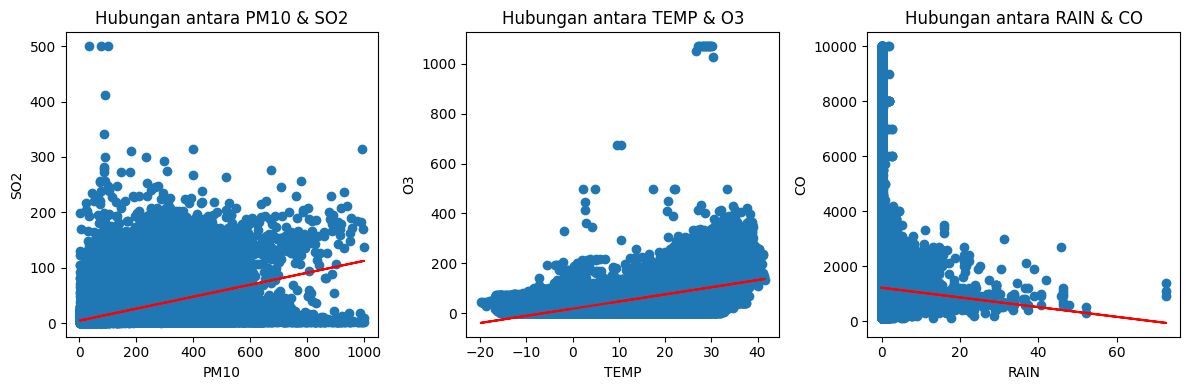

In [517]:
# Daftar pasangan variabel
pairs = [('PM10', 'SO2'), ('TEMP', 'O3'), ('RAIN', 'CO')]

# Membuat subplot
fig, axs = plt.subplots(1, len(pairs), figsize=(12, 4))

for i, pair in enumerate(pairs):
    x, y = pair
    axs[i].scatter(air_quality_merge[x], air_quality_merge[y])
    axs[i].set_xlabel(x)
    axs[i].set_ylabel(y)
    axs[i].set_title(f'Hubungan antara {x} & {y}')

    # Menambahkan garis regresi
    m, b = np.polyfit(air_quality_merge[x], air_quality_merge[y], 1)
    axs[i].plot(air_quality_merge[x], m*air_quality_merge[x] + b, color='red')

plt.tight_layout()
plt.show()

**Hubungan antara PM10 & SO2**
- Tren Positif: Terlihat adanya tren positif yang lemah antara konsentrasi PM10 dan SO2. Artinya, ketika konsentrasi PM10 meningkat, cenderung diikuti oleh peningkatan konsentrasi SO2.

- Korelasi Moderat: Korelasi antara kedua polutan ini cenderung moderat, tidak terlalu kuat. Hal ini menunjukkan bahwa ada faktor lain yang juga mempengaruhi konsentrasi SO2 selain PM10.

- Sumber Polutan: Kedua polutan ini seringkali berasal dari sumber yang sama, seperti pembakaran bahan bakar fosil. Oleh karena itu, wajar jika terdapat hubungan positif di antara keduanya.

**Hubungan antara TEMP & 03**
- Tren Positif: Terdapat tren positif yang cukup jelas antara suhu (TEMP) dan konsentrasi ozon (O3). Artinya, semakin tinggi suhu, cenderung semakin tinggi pula konsentrasi ozon.

- Korelasi Moderat: Korelasi antara suhu dan ozon juga cenderung moderat. Faktor lain seperti intensitas sinar matahari dan keberadaan senyawa organik volatil (VOC) juga dapat mempengaruhi pembentukan ozon.

- Proses Pembentukan Ozon: Suhu yang tinggi dapat mempercepat reaksi kimia yang menghasilkan ozon di atmosfer.

**Hubungan antara RAIN & CO**
- Tren Negatif: Terlihat tren negatif yang cukup jelas antara curah hujan (RAIN) dan konsentrasi karbon monoksida (CO). Artinya, semakin tinggi curah hujan, cenderung semakin rendah konsentrasi CO.

- Korelasi Moderat: Korelasi antara curah hujan dan CO juga cenderung moderat.

- Pengenceran Polutan: Curah hujan dapat membantu mengencerkan konsentrasi polutan di udara, termasuk CO. Selain itu, curah hujan juga dapat mempengaruhi aktivitas manusia yang menghasilkan CO, seperti penggunaan kendaraan bermotor.

## Visualization & Explanatory Analysis

### Pertanyan 1 : Bgaimana pola jumlah polutan setiap tahun nya ?

In [523]:
air_quality_merge.head()

,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station,datetime
0,4.0,4.0,7.0,300.0,77.0,-0.7,0.0,N,4.4,Aotizhongxin,2013-03-01 00:00:00
1,8.0,4.0,7.0,300.0,77.0,-1.1,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,7.0,5.0,10.0,300.0,73.0,-1.1,0.0,N,5.6,Aotizhongxin,2013-03-01 02:00:00
3,6.0,11.0,11.0,300.0,72.0,-1.4,0.0,W,3.1,Aotizhongxin,2013-03-01 03:00:00
4,3.0,12.0,12.0,300.0,72.0,-2.0,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [7]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import streamlit as st
import streamlit_antd_components as sac
import streamlit_shadcn_ui as ui

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Streamlit:", st.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.3
Matplotlib version: 3.8.3
Seaborn version: 0.13.2
Streamlit: 1.35.0
